In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('titanic_train.csv')
def drop_col(df,col):
    df.drop(columns=col, axis = 1, inplace = True)
def change_type(df, col, map_dict):
    df[col] = df[col].map(map_dict)
def drop_nan(df,col):
    df = df[df[col].notna()]
def change_age(df,age):
    df.loc[(df['Age'].isnull())&(df['Fare']<40), 'Age']=29
    df.loc[(df['Age'].isnull())&(df['Fare']>40), 'Age']=34
    df = df[df[age] <= 74]
def getDummies(df, col, dropfirst = True):
    df = pd.get_dummies(data = df, columns = [col], drop_first=dropfirst)
    return df
df['Survived'] = df['Survived'].astype(int)
drop_col(df,'Cabin')
drop_col(df,'PassengerId')
drop_col(df,'Name')
drop_col(df,'Ticket')
change_type(df,'Embarked',{'S':1,'C':2,'Q':3})
drop_nan(df,'Embarked')
drop_col(df,'Embarked')
change_age(df,'Age')
df = getDummies(df, 'Sex')
df = getDummies(df, 'Pclass', False)

In [4]:
df.describe()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Pclass_1,Pclass_2,Pclass_3
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.694916,0.523008,0.381594,32.204208,0.647587,0.242424,0.206510,0.551066
std,0.486592,13.024409,1.102743,0.806057,49.693429,0.477990,0.428790,0.405028,0.497665
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [5]:
X = df.drop('Survived', axis = 1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)

<AxesSubplot: >

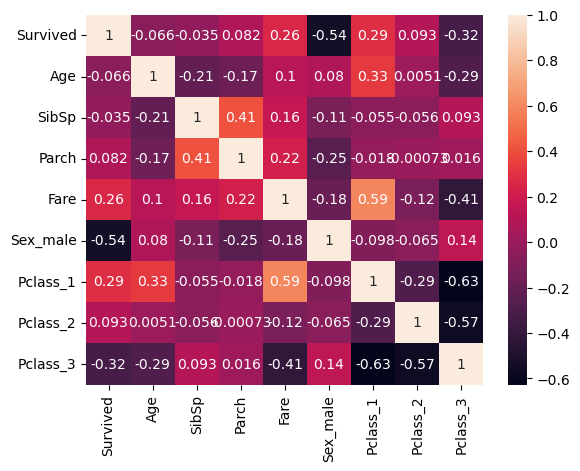

In [6]:
sns.heatmap(df.corr(), annot = True)

In [7]:
mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.fit_transform(X_test)

In [8]:
model = LogisticRegression(max_iter= 500, penalty='l2',C=.5)
model.fit(X_train, y_train)
pred= model.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.8100558659217877


In [9]:
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
print(precision, recall)

0.7536231884057971 0.7536231884057971


In [10]:
model2 = LogisticRegression(max_iter= 500, penalty='l2',C=.5)
model2.fit(X_train_scaled, y_train)
pred2= model2.predict(X_test_scaled)
accuracy2 = accuracy_score(y_test, pred2)
print(accuracy2)

0.8044692737430168


In [11]:
precision2 = precision_score(y_test, pred2)
recall2 = recall_score(y_test, pred2)
print(precision2, recall2)

0.7575757575757576 0.7246376811594203


In [12]:
model3 = LogisticRegression(max_iter= 500, penalty='l2',C=1, solver='liblinear')
model3.fit(X_train_scaled, y_train)
pred3= model2.predict(X_test_scaled)
accuracy3 = accuracy_score(y_test, pred3)
print(accuracy3)

0.8044692737430168


In [13]:
precision3 = precision_score(y_test, pred3)
recall3 = recall_score(y_test, pred3)
print(precision3, recall3)

0.7575757575757576 0.7246376811594203


In [14]:
parameters = {'penalty':[None, 'l2', 'l1', 'elasticnet'],'solver':['lbfgs', 'liblinear',
        'newton-cg', 'newton-cholesky', 'sag', 'saga'], 'max_iter': range(500, 5000, 500), 'class_weight':['balanced',None], 'C': [.2, .3, .4, .5, .8, 1, 1.2, 1.4]}
gridl=LogisticRegression()
clf1=GridSearchCV(gridl, parameters)
clf1.fit(X_train_scaled, y_train)
pred_grid=clf1.predict(X_test_scaled)

c:\Users\gfcbu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
12240 fits failed out of a total of 17280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3600 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gfcbu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gfcbu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\gfcbu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 441, in _check_solver
    raise ValueErr

In [15]:
clf1.best_params_

{'C': 1.2,
 'class_weight': None,
 'max_iter': 500,
 'penalty': 'l2',
 'solver': 'lbfgs'}

In [16]:
clf1.best_score_

0.8020191076529105

In [17]:
grid2 = clf1.best_estimator_
pred1=grid2.predict(X_test_scaled)
accuracy1= accuracy_score(y_test, pred1)
print(accuracy1)

0.8100558659217877


In [18]:
precision1 = precision_score(y_test, pred1)
recall1 = recall_score(y_test, pred1)
print(precision1, recall1)

0.7611940298507462 0.7391304347826086


In [19]:
Tree = DecisionTreeClassifier()
Tree.fit(X_train, y_train)
predictions = Tree.predict(X_test)
acc = accuracy_score(predictions, y_test)
print(acc)

0.770949720670391


In [20]:
cv_scores = cross_val_score(Tree, X, y, cv=5)
print(cv_scores)
print('cv_scores mean: {}'.format(np.mean(cv_scores)))

[0.73743017 0.80337079 0.80898876 0.7752809  0.80337079]
cv_scores mean: 0.7856882807105643


In [21]:
Tree2 = DecisionTreeClassifier()
Tree2.fit(X_train_scaled, y_train)
predictions2 = Tree2.predict(X_test_scaled)
acc2 = accuracy_score(predictions2, y_test)
print(acc2)
cv_scores = cross_val_score(Tree2, X, y, cv=5)
print(cv_scores)
print('cv_scores mean: {}'.format(np.mean(cv_scores)))

0.7597765363128491
[0.73184358 0.81460674 0.81460674 0.76966292 0.79213483]
cv_scores mean: 0.7845709622748102


In [22]:
param = {'criterion':['gini', 'entropy', 'log_loss'],'class_weight':['balanced', None], 'max_depth':range(2,20, 2)}
gridt=DecisionTreeClassifier()
clf2=GridSearchCV(gridt, param)
clf2.fit(X_train_scaled, y_train)
pred_grid=clf2.predict(X_test_scaled)

c:\Users\gfcbu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gfcbu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gfcbu\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "c:\Users\gfcbu\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_m

In [23]:
clf2.best_params_

{'class_weight': None, 'criterion': 'entropy', 'max_depth': 4}

In [29]:
Tree3 = DecisionTreeClassifier(criterion='entropy')
Tree3.fit(X_train, y_train)
predictions3 = Tree3.predict(X_test)
acc3 = accuracy_score(predictions3, y_test)
print(acc3)
cv_scores3 = cross_val_score(Tree3, X, y, cv=5)
print(cv_scores3)
print('cv_scores mean: {}'.format(np.mean(cv_scores3)))

0.770949720670391
[0.70949721 0.7752809  0.79775281 0.7752809  0.78651685]
cv_scores mean: 0.7688657334756136


In [28]:
Tree4 = DecisionTreeClassifier(criterion='entropy', max_depth=4)
Tree4.fit(X_train_scaled, y_train)
predictions4 = Tree4.predict(X_test_scaled)
acc4 = accuracy_score(predictions4, y_test)
print(acc4)
cv_scores4 = cross_val_score(Tree4, X, y, cv=5)
print(cv_scores4)
print('cv_scores mean: {}'.format(np.mean(cv_scores4)))

0.8324022346368715
[0.75977654 0.8258427  0.80337079 0.78651685 0.84269663]
cv_scores mean: 0.8036407005209968


In [27]:
Tree5 = DecisionTreeClassifier(criterion='entropy', max_depth=4)
Tree5.fit(X_train_scaled, y_train)
predictions5 = Tree5.predict(X_test_scaled)
acc5 = accuracy_score(predictions5, y_test)
print(acc5)
cv_scores5 = cross_val_score(Tree5, X, y, cv=5)
print(cv_scores5)
print('cv_scores mean: {}'.format(np.mean(cv_scores5)))

0.8324022346368715
[0.75977654 0.8258427  0.80898876 0.78651685 0.84269663]
cv_scores mean: 0.8047642960266147
